<a href="https://colab.research.google.com/github/oscarserc/TESIS/blob/main/PASO_3d___TRANSFORMERS_28x28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**UTILIZACIÓN DE TÉCNICAS DE APRENDIZAJE AUTOMÁTICO PARA LA DETECCIÓN DE ACOSADORES EN UNA RED SOCIAL**.

La base de datos que emplearemos puede llegar a unas 12.000 observaciones. El tamaño crece rápidamente. Por ejemplo 4000 observaciones son aproximadamente 50 MB.

· Pruebas iniciales con: 4.000 observaciones

· Para ello generamos una 100 **simulaciones**, y guardamos unos 40 **frames** de cada una de ellas

· Además como **target** guardamos la matriz con la IDENTIDAD de todos y cada uno de los AGENTES.



#**PRUEBA 4**: Utilizaremos la Arquitectura <font color='green'>**TRANSFORMER**</font>.

#Planteamos el problema de localizar a los agentes influyentes como un problema de **Segmentación** de imágenes. (Cada pixel corresponde a un agente y ha de ser clasificado en uno de los tipos que se han definido).





#**TRANSFORMERS**.
Este tipo de arquitectura neuronal está especialmente diseñada para el análisis de secuencias, y se originó en el área de Aprendizaje de Lenguaje Natural (NLP - *Natural Language Processing*). Todos los modelos del lenguaje avanzados (LLM - *Large Language Models*), como ChatGPT por poner un ejemplo, están basados en este tipo de arquitectura.

<br></br>

<figure>
<center>
<img src='https://github.com/oscarserc/IMAGENES/blob/main/Estructura_Transformer_1b.png?raw=true' width="650"/>
<figcaption>fig. 1: Esquema de la arquitectura Transformer (aparece la estructura completa formada por un ENCODER y un DECODER) . El bloque gris que engloba el mecanismo de atención y la FCNN se puede apilar N veces, para procesar secuencialmente la señal: la salida del primer bloque pasa al segundo y así sucesivamente. (Adaptado de <font color='blue'>[Vasgani, A. et al. (2023)]). </font></figcaption></center>
</figure>

<br></br>

Si estudiamos la forma en que está diseñado, podemos detectar una primera
capa de procesamiento que es el ENCODER. Su utilidad reside en lograr
una representación sensible al contexto de la secuencia de INPUTS que recibe.
Básicamente consiste en asociar a cada fragmento de información (token) una
proyección (embedding) en un espacio de alta dimensionalidad, de tal manera
que elementos similares tengan unas coordenadas parecidas y estén próximos
entre sí. Esto se traduce en capturar el significado de la información de
entrada.
Posteriormente los datos son procesados por un DECODER, que es el encargado
del aprendizaje de la tarea concreta que se desea desarrollar en el
transformer.


<figure>
<center>
<img src='https://github.com/oscarserc/IMAGENES/blob/main/Encoder_1f_Cuadros_mas_claros.png?raw=true' width="650"/>
<figcaption>fig. 2: Esquema del mecanismo de atención del Transformer. Entre sus características tenemos que es facilmente paralelizable. </font></figcaption></center>
</figure>

<br></br>

La arquitectura del transformer le permite analizar
secuencias de información muy largas e interiorizar dependencias
con una estructura muy compleja.
Esta característica es muy útil con cierto tipo de información
como es el lenguaje natural (NLP - Natural Language Processing).
Su origen se encuentra en este área de investigación, que es de
donde partió, aunque se uso se ha extendendido a otros campos (como la
visión por computadora) con resultados satisfactorios.

Estructura de la Arquitectura TRANSFORMERS.
<font color='blue'>[Vasgani, A. et al. (2023)]</font>

Esquema y enlaces de la Arquitectura TRANSFORMERS.
<font color='blue'>[Bahdanau, D. et al (2016)]</font>

<br></br>
<br></br>



#**<font color='brown'>· <u>Transformers Visuales</u>.</font>**


Los resultados de tratamiento de secuencias se acabaron de trasladar al procesamiento de imágenes.

<figure>
<center>
<img src='https://github.com/oscarserc/IMAGENES/blob/main/Visual_Transformer_1a.png?raw=true' width="650"/>
<figcaption>fig. 3: Esquema de la arquitectura Visual Transformer (ViT) <font color='blue'>[Dosovitskiy, A. et al. (2021)] </font></figcaption></center>
</figure>

<br></br>

Algunos autores han comprobado que las features obtenidas a través de autoentrenamiento de un ViT (visual Transformer) contienen suficiente información explícita como para llevar a cabo directamente la segmentación de las imágenes <font color='blue'>[Caron, M. et al. (2021)]</font>.

Para obtener la variante del Transformer para segmentación de imágenes hemos adaptado la estructura de la arquitectura. El diseño final quedaría como se puede comprobar en las figuras 4 y 5.

<br></br>

<figure>
<center>
<img src='https://github.com/oscarserc/IMAGENES/blob/main/Visual_Transformer_1b.png?raw=true' width="950"/>
<figcaption>fig. 4: Esquema de la arquitectura Visual Transformer (ViT) preparada, no para clasificar imágenes <font color='blue'>[Dosovitskiy, A. et al. (2021)] </font>, sino para segmentar imágenes, y adaptada para el propósito de esta Tesis.</figcaption></center>
</figure>

<br></br>

La parte ENCODER del Trasformer, tal y como ha sido programada en la parte de implementación de este Notebook aparece esquematizada a continuación (se han encadenando 3 bloques de procesamiento):

<br></br>

<figure>
<center>
<img src='https://github.com/oscarserc/IMAGENES/blob/main/Encoder_1b.png?raw=true' width="400"/>
<figcaption>fig. 5: Por un lado vemos que hay 2 <b>conexiones residuales</b>, que se encargan de fusionar la señal de entrada con la señal ya procesada. Una bifurcación está antes de entrar en el mecanismo de atención <font color="blue">&#10122;</font>, y la otra antes del procesamiento que lleva a cabo la red completamente conexa <font color="blue">&#10123;</font> (<b>FF - feed forward</b>). El objetivo, junto a la normalización (<i>Add & Norm</i> ), es el de reforzar la señal de manera que no se desvanezca cuando pasa por un número de capas muy grande. Por otro lado el <b>mecanismo de atención</b> (<i>Multi-Head Attention</i> ) es el encargado de aproximar las proyecciones los tokens que estén relacionados entre sí (en este caso elementos de la imagen de partida).</figcaption></center>
</figure>




<br></br>
**Ref**.:

<font color='brown'>[Bahdanau, D. et al (2016)]</font>
*Neural Machine Translation by Jointly Learning to Align and Translate*
https://arxiv.org/pdf/1409.0473

<font color='brown'>[Vasgani, A. et al. (2023)]</font>
*Attention is All You Need* https://arxiv.org/pdf/1706.03762

<font color='brown'>[Dosovitskiy, A. et al. (2021)] </font>
*An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale* https://arxiv.org/pdf/2010.11929

<font color='brown'>[Caron, M. et al. (2021)]</font>
*Emerging Properties in Self-Supervised Vision Transformers* https://arxiv.org/pdf/2104.14294





#**CARGA DE DATOS**.

###· Procedemos a subir el archivo local: **<font color = "brown">bd_100simulaciones_28x28_emo85_vs_15.csv</font>** a Google COLAB

###· Utilizamos la librería PANDAS para leer el archivo


In [ ]:

import pandas as pd

# Cargamos los datos
# ------------------
bd_simulaciones = pd.read_csv('bd_100simulaciones_28x28_emo85_vs_15.csv')

# Aleatorizamos
# -------------
bd_simulaciones = bd_simulaciones.sample(frac=1).reset_index(drop=True)


#Variables explicativas: **X**

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

size       = 28
num_frames = 40
df         = bd_simulaciones.copy()

lista_frames = []
X            = []

nombre_columnas_ROJO  = ['r' + str(indice) for indice in range(size*size)]
nombre_columnas_VERDE = ['g' + str(indice) for indice in range(size*size)]
nombre_columnas_AZUL  = ['b' + str(indice) for indice in range(size*size)]


for fila in range(len(bd_simulaciones)):
  canal_r = pd.array(df[nombre_columnas_ROJO].iloc[fila]).reshape(size,size)
  canal_v = pd.array(df[nombre_columnas_VERDE].iloc[fila]).reshape(size,size)
  canal_a = pd.array(df[nombre_columnas_AZUL].iloc[fila]).reshape(size,size)

  # CUIDADO que np.dstack apila los tres valores de cada pixel
  # ----------------------------------------------------------
  frame = np.array([canal_r, canal_v, canal_a])

  lista_frames.append(frame)

X = np.array(lista_frames)
X.shape



(4000, 3, 28, 28)

In [ ]:

bd_simulaciones


,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,b777,b778,b779,b780,b781,b782,b783,Simulacion_ID,Frame,Target
0,0.000000,0.2,0.4,0.2,0.4,0.2,0.2,0.2,0.2,0.6,...,0.2,0.0,0.2,1.0,0.2,0.0,0.000000,65,13,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1,0.000000,0.0,0.0,0.0,0.2,0.0,0.2,0.0,0.0,0.0,...,0.2,0.0,0.0,0.0,0.2,1.0,0.666667,60,16,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
2,0.333333,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.4,...,0.2,0.0,0.0,0.0,0.0,0.0,0.000000,29,8,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, ..."
3,0.333333,0.4,0.2,0.0,0.0,0.0,0.2,0.0,0.2,0.2,...,0.0,0.2,0.2,0.2,0.2,0.2,0.333333,87,33,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ..."
4,0.333333,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.4,...,0.2,0.0,0.0,0.0,0.0,0.0,0.000000,29,15,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2,1.0,0.4,0.333333,88,24,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."
3996,0.333333,0.4,0.2,0.0,0.0,0.0,0.2,0.0,0.2,0.2,...,0.0,0.2,0.2,0.2,0.2,0.2,0.333333,87,20,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ..."
3997,0.000000,0.4,0.4,0.4,0.2,0.0,0.0,0.0,0.0,0.0,...,1.0,0.2,0.0,0.0,0.2,0.2,0.333333,97,7,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ..."
3998,0.333333,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.8,1.0,0.4,0.0,0.0,0.000000,14,19,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


#Target: **Y**.

In [ ]:

lista_targets = []

for fila in range(len(bd_simulaciones)):
  target_value = bd_simulaciones.iloc[fila]['Target']
  if isinstance(target_value, str):
    lista_id_agentes = target_value.replace('[','').replace(']','')
    target = [int(caracter) for caracter in lista_id_agentes.split(',')]
    target = np.array(target)
    target = target.reshape(size,size)

    # Con los paréntesis  '['  ']' sale de dimensión: (8000, 1, 10, 10)   # <-------------------------- Aquí ajusto la DIMENSIÓN
    #lista_targets.append([target])
    # Si queremos de dimensión: (8000, 10, 10)
    lista_targets.append(target)
  else:
    # Handle non-string target values, e.g., skip the row or assign a default
    print(f"Skipping row {fila} due to non-string target value: {target_value}")


Y = np.array(lista_targets)
Y.shape


(4000, 28, 28)

#**CONVERSIÓN EN TENSORES DE PyTorch**.

In [ ]:

import numpy as np
import torch

# PRIMERO TENEMOS QUE EXTRAER LA MATRIX:  X
# y los valores del TARGET:               Y
#
# Luego pasaremos (X, Y) al Dataset que creamos a continuación.
# --------------------------------------------------------------

X_train = X
Y_train = Y

# CREAMOS UNA CLASE PARA LOS DATOS
# ================================

class Dataset_frames(torch.utils.data.Dataset):
  def __init__(self, X, Y):
    # self.X = torch.tensor(X).float()
    self.X = torch.tensor(X).float()
    self.Y = torch.tensor(Y).long()

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    return self.X[ix], self.Y[ix]


# SELECCIONANDO GRUPOS DE OBSERVACIONES PARA VALIDACIÓN
# -----------------------------------------------------

from sklearn.model_selection import train_test_split

X_subset, X_val, Y_subset, Y_val = train_test_split(X_train, Y_train, test_size = 0.2)

dataset = {
    'train' : Dataset_frames(X_subset, Y_subset),
    'val'   : Dataset_frames(X_val, Y_val)
}

dataloader = {
    'train' : torch.utils.data.DataLoader(dataset['train'], batch_size=30,   shuffle=False),
    'val'   : torch.utils.data.DataLoader(dataset['val'],   batch_size=30, shuffle=False)
}



In [ ]:

frames, mascara = next(iter(dataloader['train']))
frames.shape, mascara.shape


(torch.Size([30, 3, 28, 28]), torch.Size([30, 28, 28]))

#**Modelo Vision TRANSFORMER modificado para SEGMENTACIÓN** de imágenes (discriminación inicial de 2 clases).

#· PATCH EMBEDDING

Vamos a proyectar a una dimensión: <font color="green"><b>D=128</b></font>. Tomamos <font color="green"><b>BATCH = 30</b></font>.

In [ ]:

# PROYECCIÓN DE LOS DATOS
# =======================

import torch.nn as nn

class PatchEmbedding(nn.Module):
  def __init__(self, img_size, patch_size, in_chans, embed_dim):
    super().__init__()
    self.img_size   = img_size                         # (28 x 28) pixeles
    self.patch_size = patch_size                       # ( 7 x 7 ) pixeles
    self.n_patches  = (img_size // patch_size)**2      #        16 patches
    # Dividimos la imagen en patches con una           # (alto: 28 / 7 = 4,
    # convolución                                      # ancho: 28 / 7 = 4 )
    self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)

  def forward(self, x):
    x = self.proj(x)
    x = x.flatten(2)
    x = x.transpose(1,2)
    return x


# · MULTIHEAD ATTENTION

<font color="red"><b>Observación:</b></font> Introduzco como hiperparámetro predefinido: <font color="green"><b>num_heads=8</b></font>.

<font color="green"><b>Versión que funciona correctamente</b></font>

<br>

In [ ]:

# CONSTRUCTOR recibe:
# -------------------
#   img_size   =  28  (se trata de imágenes de 28 x 28)
#   patch_size =   7  (patch de tamaño 7 x 7)
#   in_chans   =   1  (un canal por imágen, es decir: se trata en blanco y negro)
#   embed_dim  = 128  (proyectamos en un espacio de 128 dimensiones)
# -------------------------------------------------------------------------------


# PASAMOS A IMPLEMENTAR: Clase MultiHead Attention
# ================================================

import math

class MultiHeadAttention(nn.Module):
  def __init__(self, n_embd=128, n_heads=8):
    super().__init__()
    self.n_heads = n_heads
    self.n_embd  = n_embd

    # Proyecciones key, query, value
    self.key   = nn.Linear(n_embd, n_embd)       # (128, 128) <- dimensiones
    self.query = nn.Linear(n_embd, n_embd)       # (128, 128)
    self.value = nn.Linear(n_embd, n_embd)       # (128, 128)

    # Proyección salida
    self.proj  = nn.Linear(n_embd, n_embd)

  def forward(self, x):
    B, L, F = x.size()

    # Calculamos los valores: (query, key, values) para todas las cabezas en el lote (batch)
    k =   self.key(x).view(B, L, F // self.n_heads, self.n_heads).transpose(1,2)  #  (d_h x L)
    q = self.query(x).view(B, L, F // self.n_heads, self.n_heads).transpose(1,2)  #  (d_h x L)
    v = self.value(x).view(B, L, F // self.n_heads, self.n_heads).transpose(1,2)  #  (d_h x L)
    # ----------------------------------------------------------------------

    # Mecanismo de atención
    att = (q @ k.transpose(-2, -1))*(1.0 / math.sqrt(k.size(-1))) # (L x nh) * (nh x L) = (L x L)
    att = torch.nn.functional.softmax(att, dim=-1)
    y = att @ v                                                   # (L x L)  * (L x nh) = (L x nh)
                                                                  # -->     queda: (B, d_h, L, nh)
    y = y.transpose(1,2).contiguous().view(B, L, F)               # (B, L, d_h, nh)   --> (B, L, F)

    return self.proj(y)



#· BLOQUE TRANSFORMER

In [ ]:

# BLOQUE TRANSFORMER
# ==================

class TransformerBlock(nn.Module):
  def __init__(self, n_embd, n_heads=8):
    super().__init__()
    # Capa de NORMALIZACIÓN nº 1
    self.ln1  = nn.LayerNorm(n_embd)
    # Capa de NORMALIZACIÓN nº 2
    self.ln2  = nn.LayerNorm(n_embd)
    # CAPA DE ATENCIÓN
    self.attn = MultiHeadAttention(n_embd, n_heads)
    # fully conected layer
    self.mlp  = nn.Sequential(
        nn.Linear(n_embd, 4*n_embd),
        nn.ReLU(),
        nn.Linear(4*n_embd, n_embd)
    )

  def forward(self, x):
    x = x + self.attn(self.ln1(x))
    x = x + self.mlp(self.ln2(x))
    return x



#· BLOQUE OUTPUT
<font color="red"><b>PRUEBA nº 1:</b></font> Intentaré generar las capas de segmentación finales. Se corresponderán con el número output_channels (uno por cada clase en que se prentende clasificar). Para discriminar entre AGENTES EMOCIONALES y AGENTES MUTANTES utilizamos: <b>output_channels = 2</b>. Es decir, hay que generar 2 máscaras al final.


In [ ]:

import torch.nn as nn

# CLASE PARA GENERAR LAS MÁSCARAS DE SEGMENTACIÓN
# ===============================================

# CONSTRUCTOR recibe:
# -------------------
#   img_size    =  28  (se trata de imágenes de 28 x 28)
#   patch_size  =   7  (patch de tamaño 7 x 7)
#   output_dims =   2  (un canal por cada máscara, es decir: clasificación 2 clases)
#   embed_dim   = 128  (proyectamos en un espacio de 128 dimensiones)
# ----------------------------------------------------------------------------------

class OUTPUT_MASKs(nn.Module):
  def __init__(self, image_size, patch_size, embed_dim, output_dims):
    super().__init__()
    self.patch_size  = patch_size
    self.output_dims = output_dims
    self.projection  = nn.Linear(embed_dim, patch_size * patch_size * output_dims)
    self.fold        = nn.Fold(output_size = (image_size, image_size), kernel_size = patch_size, stride = patch_size)

  def forward(self, x):
    B, T, C = x.shape
    x = self.projection(x)
    # -----------------------------------------------------
    # x.shape (B, T, patch_size * patch_size * output_dims)
    # -----------------------------------------------------
    # Plegamos con nn.Fold la última dimensión para que se corresponda con las dimensiones
    # de la imagen de partida (y los correspondientes canales, que serán las máscaras de segmentación)
    x = x.permute(0, 2, 1)
    x = self.fold(x)

    return x


#· Clase Visual Transformer (ViT)

<u>Observar que</u>: <font color='Blue'>[n_classes = 2]</font> es el parámetro para la <b>clasificación de la IMAGEN</b> en uno de los 2 tipos de clases. Hay que introducir una salida para una clasificación binaria (en el caso EMO/TRAIDOR) de todos y cada uno de los píxeles: es decir 2 <b>matrices máscara</b> con el tamaño de la imagen original.

<B>· PRUEBA 🛠</B>:

img_size=28  /  patch_size=7  /  num_patches=16  /  embed_dim=128  /  n_heads=8  

<font color="green"><b>Todo parece funcionar correcto.</b></font>


In [ ]:

# CLASE ViT_Segmentation (Visual Transformer para segmentación)
# =============================================================

# Número de BLOQUES TRANSFORMER   -> n_layers = 3
# Número de CABEZAS (MHAttention) -> n_heads  = 8
# Número de CLASES                -> n_classes = 2
#    por lo tanto necesitamos 2 matrices de dimensiones: img_size x img_size
#    Es decir,                                               (28  x  28)
#    Para luego obtener la predicción con una SOFTMAX.

class ViT_Segmentation(nn.Module):
  def __init__(self, img_size=28, patch_size=7, in_chans=3, embed_dim=128, n_heads=8, n_layers=3,
               n_classes=2, output_dims=2):
    super().__init__()

    self.img_size    = img_size
    self.patch_size  = patch_size
    self.in_chans    = in_chans
    self.embed_dim   = embed_dim
    self.n_heads     = n_heads
    self.output_dims = output_dims

    self.patch_embed    = PatchEmbedding(img_size, patch_size, in_chans, embed_dim)
    self.pos_embed      = nn.Parameter(torch.zeros(self.patch_embed.n_patches, embed_dim))

    self.layers = nn.Sequential(
        torch.nn.Sequential(*[TransformerBlock(embed_dim, n_heads) for _ in range(n_layers)]),
        OUTPUT_MASKs(img_size, patch_size, embed_dim, output_dims)
    )


  def forward(self, x):
    e = self.patch_embed(x)
    e = e + self.pos_embed
    y = self.layers(e)

    return y


#**MÉTODO para el ENTRENAMIENTO**.
(Probaremos con la subida de los datos a la Tarjeta Gráfica (<b>GPU</b> · <i>Graphics Processing Unit</i> ))

<figure>
<center>
<img src='https://github.com/oscarserc/IMAGENES/blob/main/GPU_1a.png?raw=true' width="250"/>
<figcaption><font></font></figcaption></center>
</figure>


In [ ]:

from sklearn.metrics import accuracy_score

# Función auxiliar
# ----------------

def softmax(x):
  return torch.exp(x) / torch.exp(x).sum(axis=-1, keepdims=True)


DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# DEFINIMOS LA FUNCIÓN DE ENTRENAMIENTO
# =====================================

def fit(model, dataloader, epochs=10, log_each=1):
   criterion = torch.nn.CrossEntropyLoss()
   optimizer = torch.optim.SGD(model.parameters(), lr=0.8)

   l, acc         = [], []
   val_l, val_acc = [], []

   for e in range(1, epochs+1):
      _l, _acc = [], []
      model.to(DEVICE)                               # <------------------- subimos a la GPU
      model.train()          # <------------------------------------------- *** MODO de TRAINING ***
      for x_b, y_b in dataloader['train']:
        x_b, y_b = x_b.to(DEVICE), y_b.to(DEVICE)    # <------------------- subimos a la GPU
        y_pred = model(x_b)                          # (No sé si las y_pred hay que subirlas explícitamente)
        loss   = criterion(y_pred, y_b)
        _l.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_probas = torch.argmax(softmax(y_pred), axis=1)
        # Los SCORES de SKLEARN no aceptan matrices, así que hay que convertirlas en dimensión 1D
        # (usar flatten())
        _acc.append(accuracy_score(y_b.numpy().flatten(), y_probas.detach().numpy().flatten()))

      l.append(np.mean(_l))
      acc.append(np.mean(_acc))
      if not e % log_each:
        print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f}")


      model.eval()            # <------------------------------------------- *** MODO de EVALUACIÓN ***
      _l, _acc = [], []
      with torch.no_grad():
        for x_b, y_b in dataloader['val']:
          x_b, y_b = x_b.to(DEVICE), y_b.to(DEVICE)   # <------------------- subimos a la GPU
          y_pred = model(x_b)
          loss   = criterion(y_pred, y_b)
          _l.append(loss.item())
          y_probas = torch.argmax(softmax(y_pred), axis=1)
          _acc.append(accuracy_score(y_b.numpy().flatten(), y_probas.numpy().flatten()))
      val_l.append(np.mean(_l))
      val_acc.append(np.mean(_acc))

   return {'epoch':list(range(1,epochs+1)), 'loss':l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc}



#**ENTRENAMIENTO DEL MODELO**.

In [ ]:

# INSTANCIAMOS EL MODELO
# ======================

# --------------------------------------------------------------------------------
img_size    =  28  # (se trata de imágenes de 28 x 28)
patch_size  =   7  # (patch de tamaño 7 x 7)
in_chans    =   3  # canales de entrada: 1
output_dims =   2  # (un canal por cada máscara, es decir: clasificación 2 clases)
embed_dim   = 128  # (proyectamos en un espacio de 128 dimensiones)
# --------------------------------------------------------------------------------
# BATCH = 30
# --------------------------------------------------------------------------------

num_epochs = 30   # 50
ViT_S = ViT_Segmentation(img_size, patch_size, in_chans, embed_dim, output_dims)

# Imprimimos junto al número de Epoch, el valor de la función de pérdida y la accuracy (aprox. 96%)
# El resultado se obtiene para unas 30 Epochs. Como la mejora es más lenta que con tros modelos
# probar con un valor más alto. Por ejemplo: 50 EPOCHS.
model  = ViT_Segmentation()
hist   = fit(model, dataloader, num_epochs)


Epoch 1/30 loss 0.41539 acc 0.57376
Epoch 2/30 loss 0.22809 acc 0.69258
Epoch 3/30 loss 0.07938 acc 0.82628
Epoch 4/30 loss 0.03640 acc 0.89901
Epoch 5/30 loss 0.02425 acc 0.92719
Epoch 6/30 loss 0.01971 acc 0.93780
Epoch 7/30 loss 0.01714 acc 0.94273
Epoch 8/30 loss 0.01536 acc 0.94521
Epoch 9/30 loss 0.01398 acc 0.94673
Epoch 10/30 loss 0.01285 acc 0.94757
Epoch 11/30 loss 0.01188 acc 0.94822
Epoch 12/30 loss 0.01102 acc 0.94878
Epoch 13/30 loss 0.01024 acc 0.94926
Epoch 14/30 loss 0.00954 acc 0.94975
Epoch 15/30 loss 0.00888 acc 0.95026
Epoch 16/30 loss 0.00828 acc 0.95076
Epoch 17/30 loss 0.00771 acc 0.95128
Epoch 18/30 loss 0.00719 acc 0.95184
Epoch 19/30 loss 0.00670 acc 0.95237
Epoch 20/30 loss 0.00624 acc 0.95298
Epoch 21/30 loss 0.00582 acc 0.95360
Epoch 22/30 loss 0.00542 acc 0.95419
Epoch 23/30 loss 0.00505 acc 0.95478
Epoch 24/30 loss 0.00471 acc 0.95538
Epoch 25/30 loss 0.00439 acc 0.95598
Epoch 26/30 loss 0.00410 acc 0.95660
Epoch 27/30 loss 0.00382 acc 0.95721
Epoch 28/3

In [ ]:

import pandas as pd

# Duración del ENTRENAMIENTO: 8 minutos (60 Epochs) Casi 97%
pd.DataFrame(hist).to_csv("Training_TRANSFORMER_60Epochs_4000ciclos_85_vs_15.csv", index=None)


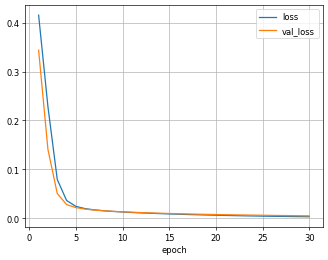

In [ ]:

# GRAFICAMOS LOS RESULTADOS DEL APRENDIZAJE - LOSS
# =========================================

import matplotlib.pyplot as plt

fig = plt.figure(dpi=60)
#fig = plt.figure(figsize=(10,6))
ax  = plt.subplot(111)
pd.DataFrame(hist).plot(x='epoch', y=['loss','val_loss'], grid=True, ax=ax)
#lt.ylim([0,0.010])
plt.show()


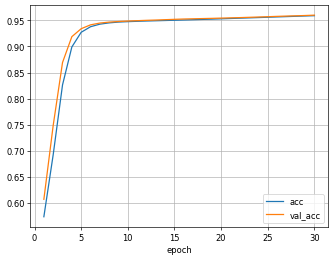

In [ ]:

# GRAFICAMOS LOS RESULTADOS DEL APRENDIZAJE - ACCURACY
# =========================================

import matplotlib.pyplot as plt

fig = plt.figure(dpi=60)
#fig = plt.figure(figsize=(10,6))
ax  = plt.subplot(111)
pd.DataFrame(hist).plot(x='epoch', y=['acc','val_acc'], grid=True, ax=ax)
#lt.ylim([0,0.010])
plt.show()



# EVOLUCIÓN DE LA ACCURACY:
# · Simulación entrenada durante 4000 ciclos: aprox. 96%
# · Simulación entrenada durante 3000 ciclos: aprox. 96%
# · Simulación entrenada durante 2000 ciclos: aprox. 93%


# <font color="brown"><b><u>EVALUACIÓN de RESULTADOS</u></b></font>.

Empleamos matrices de confusión para diseccionar cómo se producen los errores.

In [ ]:

# Importamos la librería para obtener la MATRIZ de CONFUSIÓN
# ==========================================================
# Resultados: en una matriz de texto
# ----------------------------------------------------------
from sklearn.metrics import confusion_matrix

torch.set_printoptions(precision=2)

X_prueba, y_prueba = next(iter(dataloader['val']))
y_prediccion = model(X_prueba)

y_prob = torch.argmax(softmax(y_prediccion), axis=1)
# Podemos visualizar uno de los frames: y_prueba[1] frente a
# su predicción: y_prob[1]

# Los resultados del frame en particular pueden calcularse:
# confusion_matrix(y_prueba[1].flatten().numpy(), y_prob[1].flatten().numpy())


In [ ]:

# Importamos la librería para obtener la MATRIZ de CONFUSIÓN
# ==========================================================
# Resultados: en una matriz gráfica
# ----------------------------------------------------------
from sklearn.metrics import ConfusionMatrixDisplay

# Agente emocional         --> código: 0
# Agente mutante (traidor) --> código: 1
# --------------------------------------
#ConfusionMatrixDisplay.from_predictions(y_prueba[1].flatten().numpy(), y_prob[1].flatten().numpy())


##1) Probamos con todos los píxeles de los frames (de 28x28) del conjunto de **DATOS de ENTRENAMIENTO**.

In [ ]:

from functools import reduce

predicciones_train  = []
observaciones_train = []

# Iteramos por el conjunto de datos de Validación
# -----------------------------------------------
for x_b, y_b in dataloader['train']:
  y_pred = model(x_b)
  y_prob = torch.argmax(softmax(y_pred), axis=1)
  # Se añaden como arrays a la lista, por lo que convertimos previamente a una lista
  # El resultado es una lista de lista, por lo que las reducimos a una sola más abajo
  # (Esto es así porque el procedimiento confusion_matrix sólo opera datos de 1 dimensión)
  predicciones_train.append(list(y_prob.numpy().flatten()))
  observaciones_train.append(list(y_b.numpy().flatten()))

data_pred_train = reduce(lambda a, b: a+b, predicciones_train)
data_obs_train  = reduce(lambda a, b: a+b, observaciones_train)

confusion_matrix(data_obs_train, data_pred_train)


array([[2027820,  102009],
       [      0,  378971]])

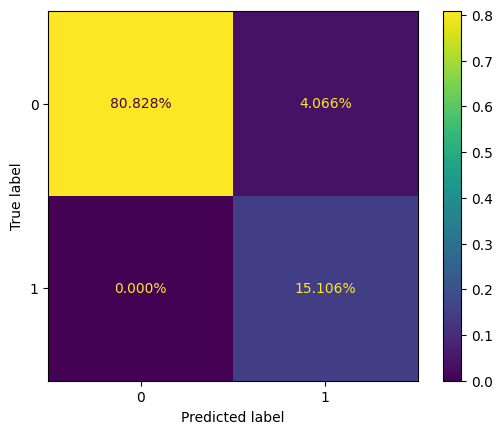

In [ ]:

ConfusionMatrixDisplay.from_predictions(data_obs_train, data_pred_train, normalize='all', values_format='.3%')



##2) Ahora probamos con todos los píxeles de los frames (de 28x28) del conjunto de **DATOS de VALIDACIÓN**.


In [ ]:

from functools import reduce

predicciones  = []
observaciones = []

# Iteramos por el conjunto de datos de Validación
# -----------------------------------------------
for x_b, y_b in dataloader['val']:
  y_pred = model(x_b)
  y_prob = torch.argmax(softmax(y_pred), axis=1)
  # Se añaden como arrays a la lista, por lo que convertimos previamente a una lista
  # El resultado es una lista de lista, por lo que las reducimos a una sola más abajo
  # (Esto es así porque el procedimiento confusion_matrix sólo opera datos de 1 dimensión)
  predicciones.append(list(y_prob.numpy().flatten()))
  observaciones.append(list(y_b.numpy().flatten()))

data_pred = reduce(lambda a, b: a+b, predicciones)
data_obs  = reduce(lambda a, b: a+b, observaciones)

confusion_matrix(data_obs, data_pred)



array([[507336,  25115],
       [     0,  94749]])

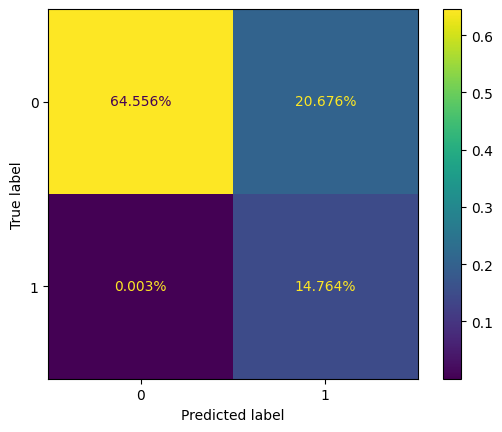

In [ ]:

ConfusionMatrixDisplay.from_predictions(data_obs, data_pred, normalize='all', values_format='.3%')


##Representamos con colores a los agentes mutantes correcta o equivocadamente identificados.

In [ ]:

from sklearn.metrics import confusion_matrix

torch.set_printoptions(precision=2)

X_obs, y_obs = next(iter(dataloader['val']))
y_probab = model(X_obs)
y_predic = torch.argmax(softmax(y_probab), axis=1)

# Utilizamos códigos para representar los colores y así identificar
# mejor a los agentes en la predicción (agentes MUTANTES)
red    = '\033[91m'
green  = '\033[92m'
black  = '\x1b[0m'
# También:
red_bold  = '\x1b[1;02;31m'
green_bold = '\x1b[1;02;32m'
# Con fondo:
red_bold_fondo  = '\x1b[1;02;31;43m'
green_bold_fondo = '\x1b[1;02;32;43m'

frame  = 2
cadena = ''
size_m = 3

for i in range(size):
  for j in range(size):
    if (y_predic[frame,i,j] != y_obs[frame,i,j]) and (y_predic[frame,i,j] == 1):
      cadena += red_bold_fondo + str(y_predic[frame,i,j].numpy()) + black + '  '
    elif (y_predic[frame,i,j] != y_obs[frame,i,j]) and (y_predic[frame,i,j] == 0):
      cadena += red_bold_fondo + '.' + black + '  '
    elif (y_predic[frame,i,j] == y_obs[frame,i,j]) and (y_predic[frame,i,j] == 1):
      cadena += green_bold + str(y_predic[frame,i,j].numpy()) + black + '  '
    else:
      cadena += str(y_predic[frame,i,j].numpy()) + '  '
  cadena += '\n'

print(cadena)


0  0  1  0  0  1  1  0  0  1  1  0  0  0  1  1  0  0  0  0  0  0  0  0  0  1  1  0  
1  0  0  1  0  1  1  0  0  1  0  0  1  0  1  0  0  0  1  1  0  0  0  0  0  0  1  0  
0  1  1  0  0  0  0  0  1  0  0  0  1  1  0  0  0  1  1  1  0  0  0  0  0  0  0  0  
0  1  0  1  0  0  0  0  0  0  0  0  0  0  1  1  1  1  0  0  1  0  0  0  0  0  0  0  
0  1  0  1  0  0  1  0  0  0  0  0  1  0  0  0  0  1  0  1  0  0  1  0  0  0  0  0  
0  0  1  0  1  1  1  0  0  1  1  0  0  1  1  1  1  0  1  0  0  0  0  0  1  0  1  0  
1  0  1  0  1  0  0  1  0  0  1  1  1  1  1  1  1  1  0  1  0  0  1  0  0  0  0  0  
0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
1  0  0  0  0  0  0  0  1  0  0  1  0  1  1  0  0  1  1  0  1  0  1  0  1  0  0  1  
0  0  0  0  0  0  1  0  0  0  0  1  1  0  1  0  0  0  0  0  0  0  0  1  1  0  1  0  
1  1  1  0  0  1  0  0  1  1  1  0  0  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  
1  0  0  1  1  1  0  0  0  1  1  0  0  1  0  0  1  1  1  1  0  1 

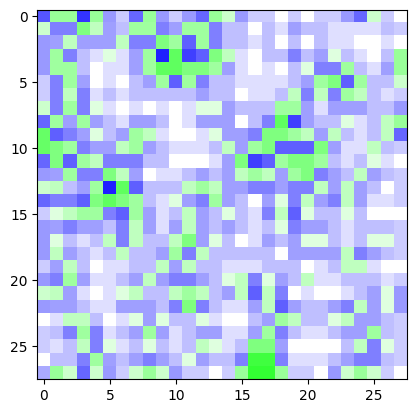

In [ ]:

import matplotlib.pyplot as plt

# Uno de los frames
# -----------------
plt.imshow(X_obs[1].permute(1,2,0))
plt.show()


##Representamos la curva <b>ROC</b>.

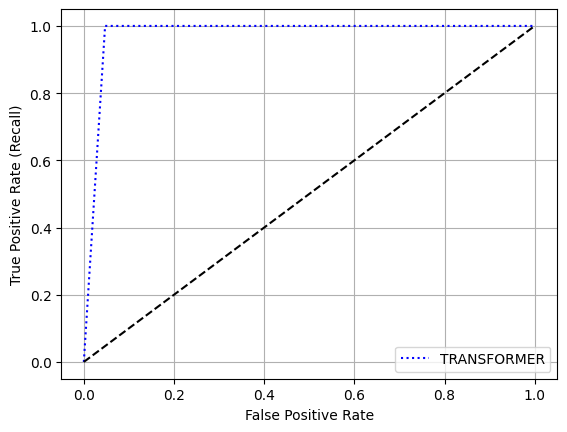

In [ ]:

from sklearn.metrics import roc_curve

# CURVA ROC  (Creo que son 'scores' lo que se le debe pasar
# como segundo argumento. No sé si se puede hacer así)
# ---------------------------------------------------------
fpr, tpr, thresholds = roc_curve(data_obs, data_pred)
#plt.plot(fpr, tpr, 'b:', label='Convolutional Neural Net')
plt.plot(fpr, tpr, 'b:', label='TRANSFORMER')
plt.plot([0, 1], [0, 1], 'k--')
#plt.axis([0, 1, 0, 1])     # Libro de Aurelien Geron
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


# <font color="brown"><b><u>ESTRUCTURA del MODELO</u></b></font>.

Vemos el número de parámetros y las capas de las que está compuesto.

In [ ]:

from torchsummary import summary

#print(model)

# EMPLEAR:
# from torchsummary import summary
# summary(your_model, input_size=(channels, H, W))
# -------------------------------------------------

# Supongo que podría valer: (3, 10, 10)
summary(model, input_size=(3, 28, 28))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 128, 4, 4]          18,944
    PatchEmbedding-2              [-1, 16, 128]               0
         LayerNorm-3              [-1, 16, 128]             256
            Linear-4              [-1, 16, 128]          16,512
            Linear-5              [-1, 16, 128]          16,512
            Linear-6              [-1, 16, 128]          16,512
            Linear-7              [-1, 16, 128]          16,512
MultiHeadAttention-8              [-1, 16, 128]               0
         LayerNorm-9              [-1, 16, 128]             256
           Linear-10              [-1, 16, 512]          66,048
             ReLU-11              [-1, 16, 512]               0
           Linear-12              [-1, 16, 128]          65,664
 TransformerBlock-13              [-1, 16, 128]               0
        LayerNorm-14              [-1, 

# <font color="brown"><b><u>OPTIMIZACIÓN de HIPERPARÁMETROS</u></b></font>.  Utilización del paquete <font color="green"><b>Optuna</b></font>

Hay otras librerías, como las de <b>scikit-learn</b> que implementan métodos de optimización como '<font color="blue">Grid Search</font>' o '<font color="blue">Random Search</font>'.

Optuna utiliza <font color="blue">Optimización bayesiana</font>.

In [ ]:

!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 23.3 MB/s eta 0:00:00


In [ ]:

import optuna

# FUNCIÓN AUXILIAR y CLASE DEL MODELO
# -----------------------------------

def softmax(x):
  return torch.exp(x) / torch.exp(x).sum(axis=-1, keepdims=True)

# CONSTRUIMOS LA FUNCIÓN QUE ES LLAMADA POR OPTUNA
# ================================================

def objetive(trial):

  # --------------------------------------------------------------------------------
  img_size    =  28  # (se trata de imágenes de 28 x 28)
  patch_size  =   7  # (patch de tamaño 7 x 7)
  in_chans    =   3  # canales de entrada: 1
  output_dims =   2  # (un canal por cada máscara, es decir: clasificación 2 clases)
  embed_dim   = 128  # (proyectamos en un espacio de 128 dimensiones)
  epochs=10
  log_each=1
  # --------------------------------------------------------------------------------
  # BATCH = 30
  # --------------------------------------------------------------------------------


  # PARÁMETROS a optimizar por OPTUNA
  # ------------------------------------------------------
  #n _dim = trial.suggest_int('dimensiones_proyeccion', [128, ])  #
  embed_dim  = 128
  #n_h    = trial.suggest_int('numero_cabezas', [4, 8, 16])
  n_h    = 8
  n_l    = trial.suggest_int('numero_capas', 2, 4)
  # ------------------------------------------------------

  model  = ViT_Segmentation(img_size, patch_size, in_chans,
                          embed_dim = n_dim,
                          n_heads   = n_h,
                          n_layers  = n_l)

  # DEFINIMOS el ENTRENAMIENTO
  # --------------------------
  criterion = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=0.8)

  l, acc         = [], []
  val_l, val_acc = [], []

  for e in range(1, epochs+1):
    _l, _acc = [], []
    model.train()  # <------------------------------------------ MODO de ENTRENAMIENTO
    for x_b, y_b in dataloader['train']:
      y_pred = model(x_b)
      loss   = criterion(y_pred, y_b)
      _l.append(loss.item())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      y_probas = torch.argmax(softmax(y_pred), axis=1)
      _acc.append(accuracy_score(y_b.numpy(), y_probas.detach().numpy()))

    l.append(np.mean(_l))
    acc.append(np.mean(_acc))
    if not e % log_each:
      print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f}")

    model.eval()  # <------------------------------------------- MODO de EVALUACIÓN
    _l, _acc = [], []
    with torch.no_grad():
      for x_b, y_b in dataloader['val']:
        y_pred = model(x_b)
        loss   = criterion(y_pred, y_b)
        _l.append(loss.item())
        y_probas = torch.argmax(softmax(y_pred), axis=1)
        _acc.append(accuracy_score(y_b.numpy(), y_probas.numpy()))
    val_l.append(np.mean(_l))
    val_acc.append(np.mean(_acc))

  RESULTADOS = {'val_acc': val_acc}

  return RESULTADOS['val_acc'][-1]




#Como queremos rastrear valores de un conjunto específico de valores, implementamos  el procedimiento manualmente.

Tarda unas 2 horas (Población 1 - 4000 ciclos y 20 Epochs).

In [ ]:

import numpy as np

# PARÁMETROS FIJOS
# --------------------------------------------------------------------------------
img_size    =  28  # (se trata de imágenes de 28 x 28)
patch_size  =   7  # (patch de tamaño 7 x 7)
in_chans    =   3  # canales de entrada: 1
output_dims =   2  # (un canal por cada máscara, es decir: clasificación 2 clases)
num_epochs=20
# --------------------------------------------------------------------------------
# BATCH = 30
# --------------------------------------------------------------------------------

# PARÁMETROS a optimizar
# ------------------------------------------------------
embed_dims_list = [64, 128, 256]
n_heads_list    = [4, 8, 16]
n_layers_list   = [1,2,3,4]
# ------------------------------------------------------

# GUARDAR RESULTADOS
Resultados = np.zeros((len(n_layers_list), len(embed_dims_list), len(n_heads_list)))

# GRID SEARCH
# -----------
for i, n_l in enumerate(n_layers_list):
  for j, n_dim in enumerate(embed_dims_list):
    for k, n_h in enumerate(n_heads_list):
      model  = ViT_Segmentation(img_size, patch_size, in_chans,
                          embed_dim = n_dim,
                          n_heads   = n_h,
                          n_layers  = n_l)
      hist   = fit(model, dataloader, num_epochs)
      print('prueba: ', n_l, 'capas -> (', n_dim, ',', n_h,')')
      Resultados[i,j,k] = hist['val_acc'][-1]


Epoch 1/20 loss 0.40024 acc 0.58994
Epoch 2/20 loss 0.30229 acc 0.65782
Epoch 3/20 loss 0.19141 acc 0.71713
Epoch 4/20 loss 0.10776 acc 0.78057
Epoch 5/20 loss 0.06563 acc 0.83156
Epoch 6/20 loss 0.04368 acc 0.86591
Epoch 7/20 loss 0.03408 acc 0.88361
Epoch 8/20 loss 0.02872 acc 0.89392
Epoch 9/20 loss 0.02521 acc 0.90064
Epoch 10/20 loss 0.02271 acc 0.90520
Epoch 11/20 loss 0.02082 acc 0.90848
Epoch 12/20 loss 0.01934 acc 0.91088
Epoch 13/20 loss 0.01812 acc 0.91258
Epoch 14/20 loss 0.01709 acc 0.91383
Epoch 15/20 loss 0.01619 acc 0.91461
Epoch 16/20 loss 0.01540 acc 0.91521
Epoch 17/20 loss 0.01468 acc 0.91567
Epoch 18/20 loss 0.01401 acc 0.91603
Epoch 19/20 loss 0.01338 acc 0.91635
Epoch 20/20 loss 0.01280 acc 0.91672
prueba:  1 capas -> ( 64 , 4 )
Epoch 1/20 loss 0.39943 acc 0.59987
Epoch 2/20 loss 0.29641 acc 0.66448
Epoch 3/20 loss 0.17915 acc 0.72446
Epoch 4/20 loss 0.10300 acc 0.78735
Epoch 5/20 loss 0.06236 acc 0.83762
Epoch 6/20 loss 0.04245 acc 0.86983
Epoch 7/20 loss 0.0328

# Representamos gráficamente los resultados

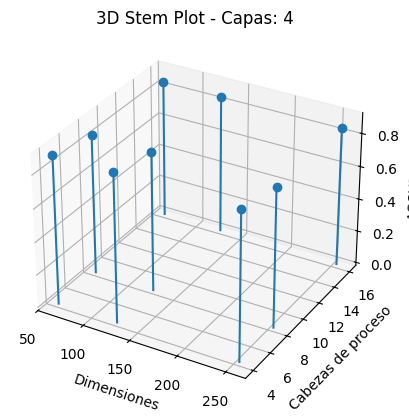

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Valores por CAPA:
# ----------------
X_cat = [64, 128, 256]
Y_cat = [ 4,   8,  16]

# Accuracy (Una matriz con los resultados de cada capa)
# -----------------------------------------------------
Z_2D_1 = Resultados[0,:,:]
Z_2D_2 = Resultados[1,:,:]
Z_2D_3 = Resultados[2,:,:]
Z_2D_4 = Resultados[3,:,:]

fig = plt.figure(dpi=100)
ax  = fig.add_subplot(111, projection='3d')

# Expandimos para que cuadren las dimensiones con un MESHGRID
x_coords, y_coords = np.meshgrid(X_cat, Y_cat)

# Convertimos en 1D con .flatten()
# Con el comando: basefmt=" ", borramos la linea roja que sale en la base
#   y que contecta todos los puntos entre sí
ax.stem(x_coords.flatten(), y_coords.flatten(), Z_2D_4.flatten(), basefmt=" ")

ax.set_xlabel('Dimensiones')
ax.set_ylabel('Cabezas de proceso')
ax.set_zlabel('ACCURACY')
ax.set_title('3D Stem Plot - Capas: 4')

plt.show()


In [ ]:

import numpy as np

np.savetxt("Matriz_GridSearch_Transformer_1.csv", Resultados[0,:,:], delimiter=",")
np.savetxt("Matriz_GridSearch_Transformer_2.csv", Resultados[1,:,:], delimiter=",")
np.savetxt("Matriz_GridSearch_Transformer_3.csv", Resultados[2,:,:], delimiter=",")
np.savetxt("Matriz_GridSearch_Transformer_4.csv", Resultados[3,:,:], delimiter=",")


In [ ]:

import numpy as np
import pandas as pd

m1 = pd.read_csv("Matriz_GridSearch_Transformer_1.csv", header=None)
m2 = pd.read_csv("Matriz_GridSearch_Transformer_2.csv", header=None)
m3 = pd.read_csv("Matriz_GridSearch_Transformer_3.csv", header=None)
m4 = pd.read_csv("Matriz_GridSearch_Transformer_4.csv", header=None)

# Sustituimos los valores en los que se atascaba por 0
# Cuando sale NaN, se queda fijo alrededor de 0.84
m1 = pd.DataFrame(m1.values, index=["4", "8", "16"], columns=["64", "128", "256"])
m2 = pd.DataFrame(m2.values, index=["4", "8", "16"], columns=["64", "128", "256"])
m3 = pd.DataFrame(m3.values, index=["4", "8", "16"], columns=["64", "128", "256"])
m4 = pd.DataFrame(m4.values, index=["4", "8", "16"], columns=["64", "128", "256"])
m4


,64,128,256
4,0.901668,0.905408,0.899469
8,0.848491,0.848491,0.848491
16,0.848491,0.848491,0.848491


In [ ]:

m4.values.flatten()


array([0.90166761, 0.90540832, 0.89946932, 0.84849143, 0.84849143,
       0.84849143, 0.84849143, 0.84849143, 0.84849143])

# AHORA GRAFICAMOS PONIENDO A 0 LOS TRAINING PROBLEMÁTICOS

(Donde la loss empieza a poner: NaN)

# LAYERS: 1

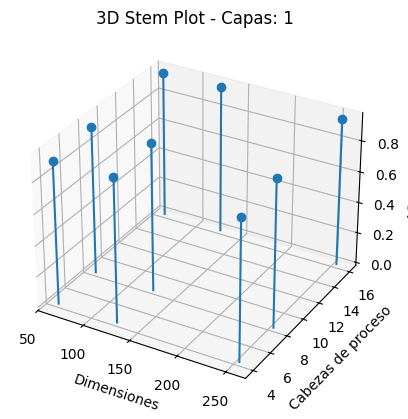

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Valores por CAPA:
# ----------------
X_cat = [64, 128, 256]
Y_cat = [ 4,   8,  16]

# Accuracy (Una matriz con los resultados de cada capa)
# -----------------------------------------------------
Z_2D_1 = m1.values

fig = plt.figure(dpi=100)
ax  = fig.add_subplot(111, projection='3d')

# Expandimos para que cuadren las dimensiones con un MESHGRID
x_coords, y_coords = np.meshgrid(X_cat, Y_cat)

# Convertimos en 1D con .flatten()
# Con el comando: basefmt=" ", borramos la linea roja que sale en la base
#   y que contecta todos los puntos entre sí
ax.stem(x_coords.flatten(), y_coords.flatten(), Z_2D_1.flatten(), basefmt=" ")

ax.set_xlabel('Dimensiones')
ax.set_ylabel('Cabezas de proceso')
ax.set_zlabel('ACCURACY')
ax.set_title('3D Stem Plot - Capas: 1')

plt.show()


# LAYERS: 2

In [ ]:

m2.loc["16",  "64"] = 0.0
m2.loc["16", "128"] = 0.0
m2.loc["16", "256"] = 0.0
m2


,64,128,256
4,0.907783,0.898934,0.910634
8,0.944872,0.951032,0.953582
16,0.000000,0.000000,0.000000


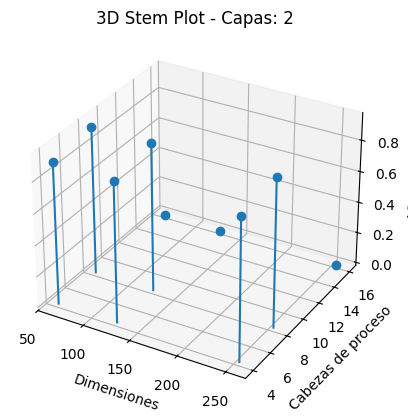

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Valores por CAPA:
# ----------------
X_cat = [64, 128, 256]
Y_cat = [ 4,   8,  16]

# Accuracy (Una matriz con los resultados de cada capa)
# -----------------------------------------------------
Z_2D_2 = m2.values

fig = plt.figure(dpi=100)
ax  = fig.add_subplot(111, projection='3d')

# Expandimos para que cuadren las dimensiones con un MESHGRID
x_coords, y_coords = np.meshgrid(X_cat, Y_cat)

# Convertimos en 1D con .flatten()
# Con el comando: basefmt=" ", borramos la linea roja que sale en la base
#   y que contecta todos los puntos entre sí
ax.stem(x_coords.flatten(), y_coords.flatten(), Z_2D_2.flatten(), basefmt=" ")

ax.set_xlabel('Dimensiones')
ax.set_ylabel('Cabezas de proceso')
ax.set_zlabel('ACCURACY')
ax.set_title('3D Stem Plot - Capas: 2')

plt.show()


# LAYERS: 3

In [ ]:

m3.loc["16",  "64"] = 0.0
m3.loc["16", "128"] = 0.0
m3.loc["16", "256"] = 0.0
m3


,64,128,256
4,0.899434,0.895879,0.909796
8,0.946207,0.948973,0.954238
16,0.000000,0.000000,0.000000


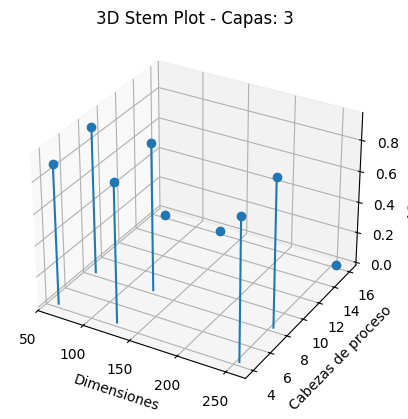

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Valores por CAPA:
# ----------------
X_cat = [64, 128, 256]
Y_cat = [ 4,   8,  16]

# Accuracy (Una matriz con los resultados de cada capa)
# -----------------------------------------------------
Z_2D_3 = m3.values

fig = plt.figure(dpi=100)
ax  = fig.add_subplot(111, projection='3d')

# Expandimos para que cuadren las dimensiones con un MESHGRID
x_coords, y_coords = np.meshgrid(X_cat, Y_cat)

# Convertimos en 1D con .flatten()
# Con el comando: basefmt=" ", borramos la linea roja que sale en la base
#   y que contecta todos los puntos entre sí
ax.stem(x_coords.flatten(), y_coords.flatten(), Z_2D_3.flatten(), basefmt=" ")

ax.set_xlabel('Dimensiones')
ax.set_ylabel('Cabezas de proceso')
ax.set_zlabel('ACCURACY')
ax.set_title('3D Stem Plot - Capas: 3')

plt.show()


# LAYERS: 4

In [ ]:
m4.loc[ "8",  "64"] = 0.0
m4.loc[ "8", "128"] = 0.0
m4.loc[ "8", "256"] = 0.0
m4.loc["16",  "64"] = 0.0
m4.loc["16", "128"] = 0.0
m4.loc["16", "256"] = 0.0
m4

,64,128,256
4,0.901668,0.905408,0.899469
8,0.000000,0.000000,0.000000
16,0.000000,0.000000,0.000000


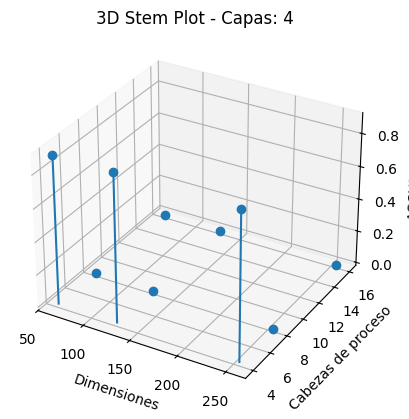

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Valores por CAPA:
# ----------------
X_cat = [64, 128, 256]
Y_cat = [ 4,   8,  16]

# Accuracy (Una matriz con los resultados de cada capa)
# -----------------------------------------------------
Z_2D_4 = m4.values

fig = plt.figure(dpi=100)
ax  = fig.add_subplot(111, projection='3d')

# Expandimos para que cuadren las dimensiones con un MESHGRID
x_coords, y_coords = np.meshgrid(X_cat, Y_cat)

# Convertimos en 1D con .flatten()
# Con el comando: basefmt=" ", borramos la linea roja que sale en la base
#   y que contecta todos los puntos entre sí
ax.stem(x_coords.flatten(), y_coords.flatten(), Z_2D_4.flatten(), basefmt=" ")

ax.set_xlabel('Dimensiones')
ax.set_ylabel('Cabezas de proceso')
ax.set_zlabel('ACCURACY')
ax.set_title('3D Stem Plot - Capas: 4')

plt.show()


In [ ]:

estudio = optuna.create_study(direction='maximize')
estudio.optimize(objetive, n_trials=4)

print(estudio.best_params)


In [ ]:

embed_dims_list = [64, 128, 258]
n_heads_list   = [4, 8, 16]
n_layers_list  = [1,2,3,4]

# PARÁMETROS a optimizar
# ------------------------------------------------------

# GUARDAR RESULTADOS
Resultados = np.zeros((3,3,3))

cont_1 = 0
cont_2 = 0
cont_3 = 0

# GRID SEARCH
# -----------
for n_layer_val in n_layers_list:
  for embed_dim_val in embed_dims_list:
    for n_head_val in n_heads_list:
      print(f"n_l: {n_layer_val}, n_dim: {embed_dim_val}, n_h: {n_head_val}")

n_l: 1, n_dim: 64, n_h: 4
n_l: 1, n_dim: 64, n_h: 8
n_l: 1, n_dim: 64, n_h: 16
n_l: 1, n_dim: 128, n_h: 4
n_l: 1, n_dim: 128, n_h: 8
n_l: 1, n_dim: 128, n_h: 16
n_l: 1, n_dim: 258, n_h: 4
n_l: 1, n_dim: 258, n_h: 8
n_l: 1, n_dim: 258, n_h: 16
n_l: 2, n_dim: 64, n_h: 4
n_l: 2, n_dim: 64, n_h: 8
n_l: 2, n_dim: 64, n_h: 16
n_l: 2, n_dim: 128, n_h: 4
n_l: 2, n_dim: 128, n_h: 8
n_l: 2, n_dim: 128, n_h: 16
n_l: 2, n_dim: 258, n_h: 4
n_l: 2, n_dim: 258, n_h: 8
n_l: 2, n_dim: 258, n_h: 16
n_l: 3, n_dim: 64, n_h: 4
n_l: 3, n_dim: 64, n_h: 8
n_l: 3, n_dim: 64, n_h: 16
n_l: 3, n_dim: 128, n_h: 4
n_l: 3, n_dim: 128, n_h: 8
n_l: 3, n_dim: 128, n_h: 16
n_l: 3, n_dim: 258, n_h: 4
n_l: 3, n_dim: 258, n_h: 8
n_l: 3, n_dim: 258, n_h: 16
n_l: 4, n_dim: 64, n_h: 4
n_l: 4, n_dim: 64, n_h: 8
n_l: 4, n_dim: 64, n_h: 16
n_l: 4, n_dim: 128, n_h: 4
n_l: 4, n_dim: 128, n_h: 8
n_l: 4, n_dim: 128, n_h: 16
n_l: 4, n_dim: 258, n_h: 4
n_l: 4, n_dim: 258, n_h: 8
n_l: 4, n_dim: 258, n_h: 16


In [ ]:

import numpy as np


